## **MGTA415_Final_Project**
### **2016 Election Analysis**

### **Team Members**:
- Allen Li
- Ye Zheng
- Hang Lyu

In [2]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re


import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/daallen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daallen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### __Load Data__

In [3]:
import os
debate_path = "./debates/"
speech_path_trump = "./speeches/trump/"
speech_path_clinton = "./speeches/clinton/"

debate_files = [f for f in os.listdir(debate_path) if f.endswith('.txt')]
debates = {file: open(debate_path + file, encoding="utf-8").read() for file in debate_files}

trump_files = [f for f in os.listdir(speech_path_trump) if f.endswith('.txt')]
trump_speeches = {file: open(speech_path_trump + file, encoding="utf-8").read() for file in trump_files}

clinton_files = [f for f in os.listdir(speech_path_clinton) if f.endswith('.txt')]
clinton_speeches = {file: open(speech_path_clinton + file, encoding="utf-8").read() for file in clinton_files}

print("Debates:", debates.keys())  
print("Trump Speeches:", len(trump_speeches))  
print("Clinton Speeches:", len(clinton_speeches))

Debates: dict_keys(['clinton_2nd.txt', 'trump_2nd.txt', 'trump_1st.txt', 'trump_3rd.txt', 'clinton_1st.txt', 'clinton_3rd.txt'])
Trump Speeches: 64
Clinton Speeches: 35


### __Clean&Preprocess Data__

In [4]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    words = word_tokenize(text) 
    words = [word for word in words if word not in stopwords.words('english') and len(word) > 2] 
    return words

In [5]:
# example
trump_1st_tokens = preprocess_text(debates["trump_1st.txt"])
print(trump_1st_tokens[:50])

['thank', 'lester', 'jobs', 'fleeing', 'country', 'theyre', 'going', 'mexico', 'theyre', 'going', 'many', 'countries', 'look', 'china', 'country', 'terms', 'making', 'product', 'theyre', 'devaluing', 'currency', 'theres', 'nobody', 'government', 'fight', 'good', 'fight', 'winning', 'fight', 'theyre', 'using', 'country', 'piggy', 'bank', 'rebuild', 'china', 'many', 'countries', 'thing', 'losing', 'good', 'jobs', 'many', 'look', 'whats', 'happening', 'mexico', 'friend', 'mine', 'builds']


In [6]:
debates_processed = {file: preprocess_text(text) for file, text in debates.items()}

trump_processed = {file: preprocess_text(text) for file, text in trump_speeches.items()}

clinton_processed = {file: preprocess_text(text) for file, text in clinton_speeches.items()}

print("Processed Trump Speech Example:", list(trump_processed.keys())[0])
print(trump_processed[list(trump_processed.keys())[0]][:20])  

print("Processed Clinton Speech Example:", list(clinton_processed.keys())[0])
print(clinton_processed[list(clinton_processed.keys())[0]][:20])  


Processed Trump Speech Example: Trump_HendersonNV_Oct-5-16.txt
['thank', 'great', 'city', 'henderson', 'beautiful', 'state', 'nevada', 'state', 'many', 'great', 'friends', 'employees', 'days', 'going', 'win', 'state', 'going', 'win', 'white', 'house']
Processed Clinton Speech Example: Clinton_WiltonManorsFL_Oct-30-16.txt
['excited', 'want', 'thank', 'know', 'really', 'sorry', 'know', 'lot', 'people', 'outdoors', 'cant', 'get', 'inso', 'want', 'give', 'big', 'shout', 'overflow', 'outside', 'lot']


### __Word Frequency Analysis__

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

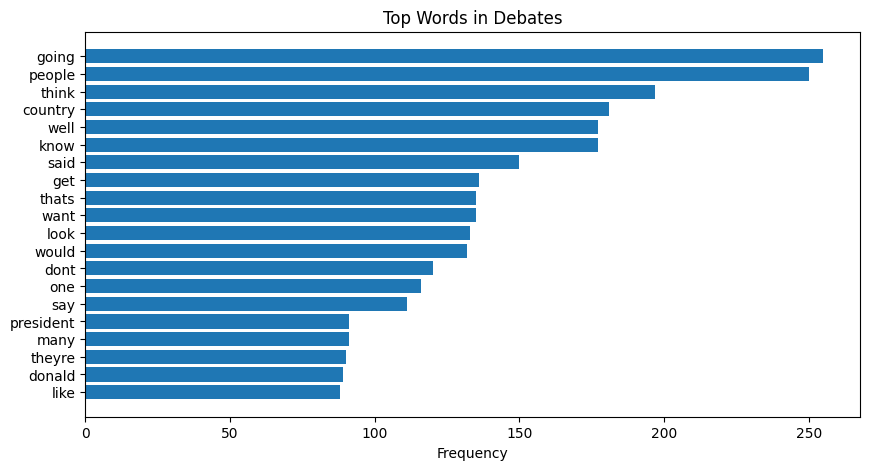

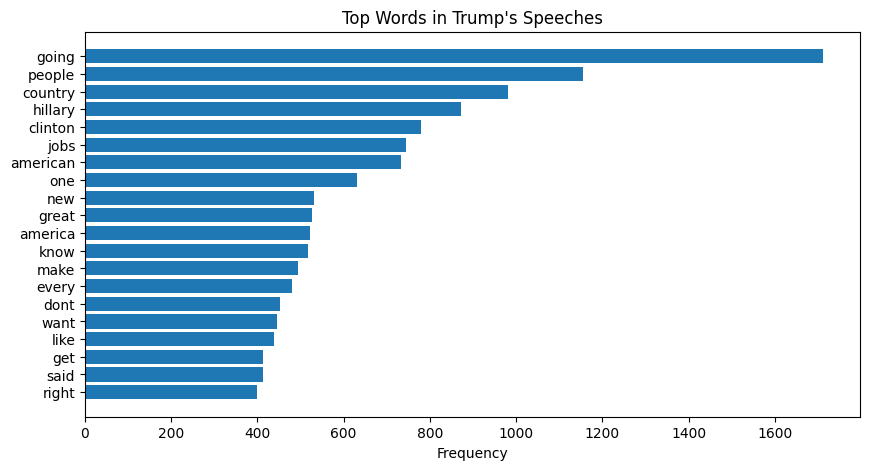

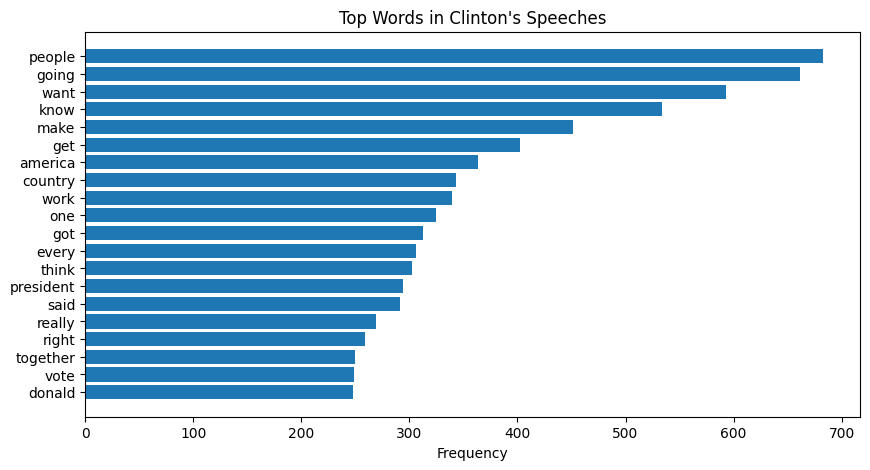

In [9]:
def plot_most_common_words(word_dict, title, n=20):
    all_words = [word for words in word_dict.values() for word in words]
    word_counts = Counter(all_words).most_common(n) 
    
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10,5))
    plt.barh(words, counts)
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis() 
    plt.show()


plot_most_common_words(debates_processed, "Top Words in Debates")
plot_most_common_words(trump_processed, "Top Words in Trump's Speeches")
plot_most_common_words(clinton_processed, "Top Words in Clinton's Speeches")

### __Word Cloud Visual__

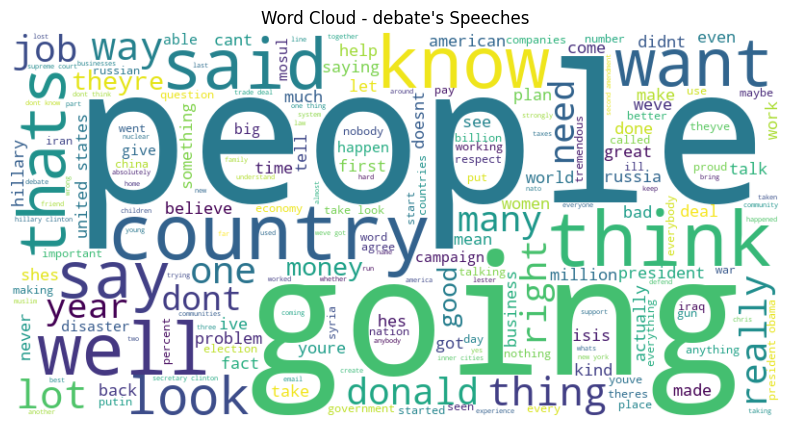

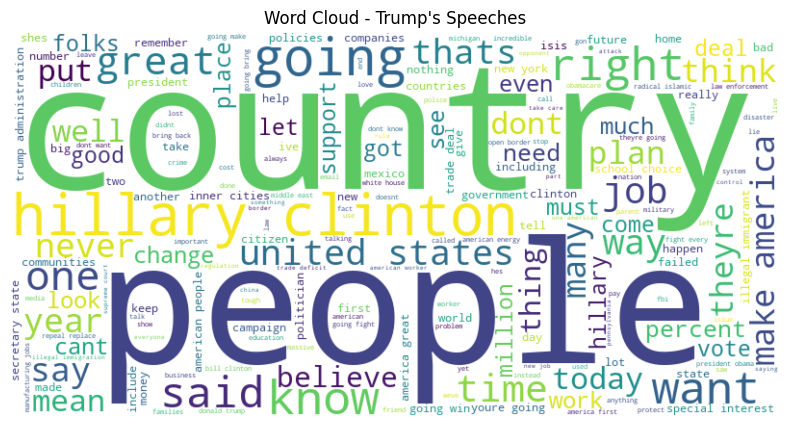

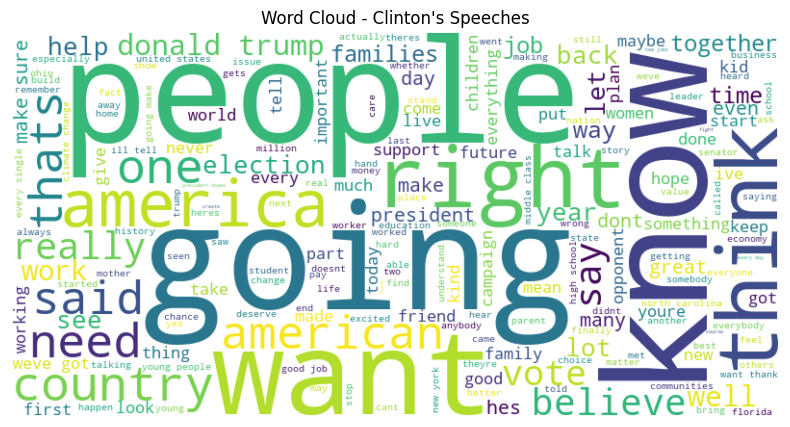

In [13]:
!pip install wordcloud

from wordcloud import WordCloud

def generate_wordcloud(word_dict, title):
    all_text = " ".join([" ".join(words) for words in word_dict.values()])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(debates_processed, "Word Cloud - debate's Speeches")
generate_wordcloud(trump_processed, "Word Cloud - Trump's Speeches")
generate_wordcloud(clinton_processed, "Word Cloud - Clinton's Speeches")


### __Sentiment Analysis__

In [18]:
from textblob import TextBlob
import pandas as pd

def compute_sentiment(word_dict):
    sentiment_scores = {file: TextBlob(" ".join(words)).sentiment.polarity for file, words in word_dict.items()}
    return pd.DataFrame(sentiment_scores.items(), columns=["Speech", "Sentiment"])

df_trump_sentiment = compute_sentiment(trump_processed)
df_clinton_sentiment = compute_sentiment(clinton_processed)


df_trump_sentiment_sorted = df_trump_sentiment.sort_values(by="Sentiment", ascending=False)
df_clinton_sentiment_sorted = df_clinton_sentiment.sort_values(by="Sentiment", ascending=False)

print("Top 5 Most Positive Trump Speeches")
print(df_trump_sentiment_sorted.head())

print("Top 5 Most Negative Trump Speeches")
print(df_trump_sentiment_sorted.tail())


Top 5 Most Positive Trump Speeches
                              Speech  Sentiment
10        Trump_Detroit_Sep-3-16.txt   0.265746
9   Trump_ValleyForgePA_Nov-1-16.txt   0.202084
31     Trump_Cincinnati_Sep-1-16.txt   0.185910
7        Trump_GreenBay_Aug-5-16.txt   0.180444
33     Trump_RoanokeVA_Sep-24-16.txt   0.168445
Top 5 Most Negative Trump Speeches
                            Speech  Sentiment
52   Trump_JacksonMS_Aug-24-16.txt   0.020031
32  Trump_GreenBayWI_Oct-17-16.txt   0.002727
3     Trump_GoldenCO_Oct-29-16.txt   0.000542
25     Trump_Phoenix_Oct-29-16.txt  -0.016475
22     Trump_Houston_Sep-17-16.txt  -0.029789


In [19]:
print("Top 5 Most Positive Clinton Speeches")
print(df_clinton_sentiment_sorted.head())

print("Top 5 Most Negative Clinton Speeches")
print(df_clinton_sentiment_sorted.tail())

Top 5 Most Positive Clinton Speeches
                                  Speech  Sentiment
8           Clinton_Raleigh_Nov-7-16.txt   0.287057
32  Clinton_CoralSpringsFL_Sep-30-16.txt   0.214971
6       Clinton_FtPierceFL_Sep-30-16.txt   0.213874
20      Clinton_Pittsburgh_Oct-22-16.txt   0.208904
19  Clinton_WinstonSalemNC_Oct-27-16.txt   0.199506
Top 5 Most Negative Clinton Speeches
                           Speech  Sentiment
5   Clinton_MiamiFL_Oct-11-16.txt   0.122226
16   Clinton_KentOH_Oct-31-16.txt   0.117424
24       Clinton_DC_Sep-16-16.txt   0.115682
26    Clinton_Toledo_Oct-3-16.txt   0.110277
17      Clinton_NYC_Oct-20-16.txt   0.084909


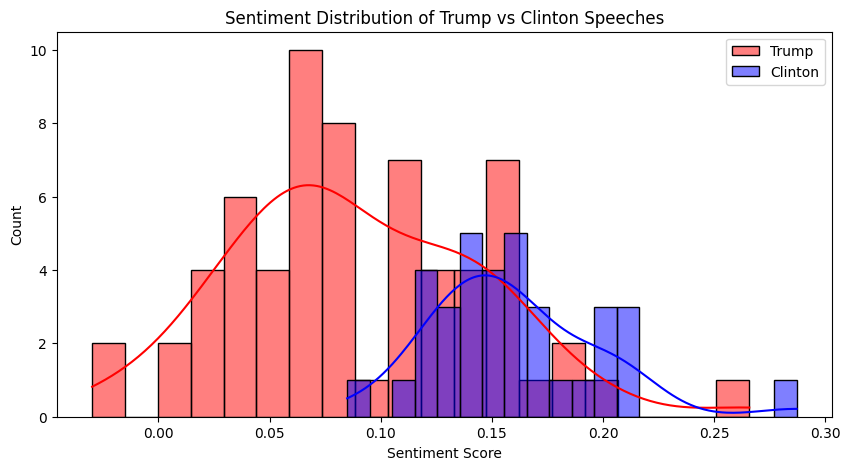

In [15]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_trump_sentiment["Sentiment"], kde=True, bins=20, color='red', label="Trump")
sns.histplot(df_clinton_sentiment["Sentiment"], kde=True, bins=20, color='blue', label="Clinton")
plt.xlabel("Sentiment Score")
plt.title("Sentiment Distribution of Trump vs Clinton Speeches")
plt.legend()
plt.show()


### __Topic Modeling (LDA)__

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def extract_topics(word_dict, n_topics=3):
    all_text = [" ".join(words) for words in word_dict.values()]
    
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(all_text)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"Topic {idx+1}: ", [words[i] for i in topic.argsort()[-10:]])

# Extract topics from Trump & Clinton speeches
print("🔹 Topics in Trump Speeches:")
extract_topics(trump_processed)

print("\n🔹 Topics in Clinton Speeches:")
extract_topics(clinton_processed)


🔹 Topics in Trump Speeches:
Topic 1:  ['country', 'like', 'right', 'great', 'said', 'theyre', 'dont', 'know', 'people', 'going']
Topic 2:  ['make', 'america', 'new', 'going', 'people', 'jobs', 'hillary', 'clinton', 'country', 'american']
Topic 3:  ['make', 'american', 'illegal', 'people', 'america', 'jobs', 'clinton', 'hillary', 'country', 'going']

🔹 Topics in Clinton Speeches:
Topic 1:  ['donald', 'president', 'got', 'work', 'america', 'make', 'want', 'know', 'people', 'going']
Topic 2:  ['know', 'vote', 'thank', 'got', 'country', 'work', 'make', 'going', 'want', 'people']
Topic 3:  ['world', 'plan', 'going', 'service', 'america', 'new', 'country', 'jobs', 'american', 'people']


### __Pools Data__

In [30]:
#from IPython.display import Markdown
#display(Markdown("polls_data.md"))

In [27]:
import pandas as pd

fivethirtyeight_polls = pd.read_csv("./polls/fivethirtyeight/president_general_polls_2016.csv")
usc_polls = pd.read_csv("./polls/usc_daybreak/popvote_votergroups.csv")

print("\n🔹 FiveThirtyEight Polls:")
print(fivethirtyeight_polls.head())



🔹 FiveThirtyEight Polls:
   cycle     branch        type                        matchup forecastdate  \
0   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
1   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
2   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
3   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   
4   2016  President  polls-plus  Clinton vs. Trump vs. Johnson      11/8/16   

  state  startdate    enddate                  pollster grade  ...  \
0  U.S.  11/3/2016  11/6/2016  ABC News/Washington Post    A+  ...   
1  U.S.  11/1/2016  11/7/2016   Google Consumer Surveys     B  ...   
2  U.S.  11/2/2016  11/6/2016                     Ipsos    A-  ...   
3  U.S.  11/4/2016  11/7/2016                    YouGov     B  ...   
4  U.S.  11/3/2016  11/6/2016          Gravis Marketing    B-  ...   

   adjpoll_clinton adjpoll_trump  adjpoll_johnson  adjpoll_mcmullin  \
0      

In [28]:
print("\n🔹 USC Daybreak Polls:")
print(usc_polls.head())


🔹 USC Daybreak Polls:
      date     N  Trump_Male  Clinton_Male  sediff_Male    Lo_Male    Up_Male  \
0  7/10/16  1282   49.757304     37.366966     5.951436  37.729727  49.394543   
1  7/11/16  1520   51.589910     35.386664     5.414716  38.181865  48.794709   
2  7/12/16  1600   50.213794     36.105722     5.391001  37.876577  48.442938   
3  7/13/16  1607   50.508472     35.717524     5.362496  37.857752  48.368244   
4  7/14/16  1608   50.528543     35.763690     6.389299  36.884604  49.407629   

   Nsubgrp_Male  Trump_Female  Clinton_Female  ...  Clinton_Inc75kp  \
0           599     36.327399       42.924916  ...        42.134577   
1           712     36.085853       44.535520  ...        41.736354   
2           747     37.496277       44.106166  ...        41.836224   
3           742     36.843191       43.820402  ...        40.130013   
4           750     35.309567       44.504249  ...        40.123946   

   sediff_Inc75kp  Lo_Inc75kp  Up_Inc75kp  Nsubgrp_Inc75kp  Tru